Importing the libraries

In [ ]:
import numpy as n
import pandas as p
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Read the dataset

In [ ]:
data=p.read_csv("/content/gdrive/My Drive/Projects/breast-cancer.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

DATA PREPROCESSING

In [ ]:
columns=['smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','perimeter_se',
         'smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','texture_se',
         'smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

In [ ]:
for i in columns:
  data[i]=data[i].round(2)


In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,1575.0,0.14,0.20,0.40,0.16,0.24,0.08


In [ ]:
data.shape

(569, 32)

Converting the "diagnosis" column datatype to "numeric"

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])



Finding correlation of columns w.r.t "diagnosis" attribute

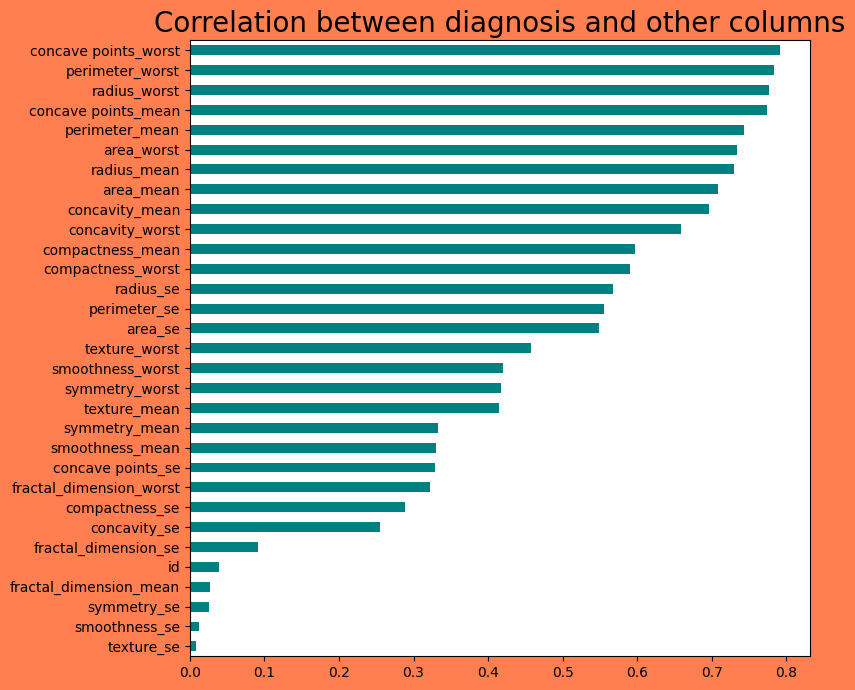

In [ ]:
correlation = data.corr()
correlation=data.corr()
plt.figure(figsize=(8, 8),facecolor="coral")
abs(correlation['diagnosis']).sort_values(ascending=True)[:-1].plot.barh(color='teal')
plt.title('Correlation between diagnosis and other columns',fontsize=20)
plt.show()

Dropping some attributes which have less correlation with target variable

In [ ]:
data = data.drop(['texture_se','smoothness_se','symmetry_se','fractal_dimension_mean','id','fractal_dimension_se'], axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  radius_se                569 non-null    float64
 11  perimeter_se             569 non-null    float64
 12  area_se                  569 non-null    float64
 13  compactness_se           569 non-null    float64
 14  concavity_se             5

Text(0.5, 1.0, 'Count of malignant and benign\n0-Benign\n1-Malignant')

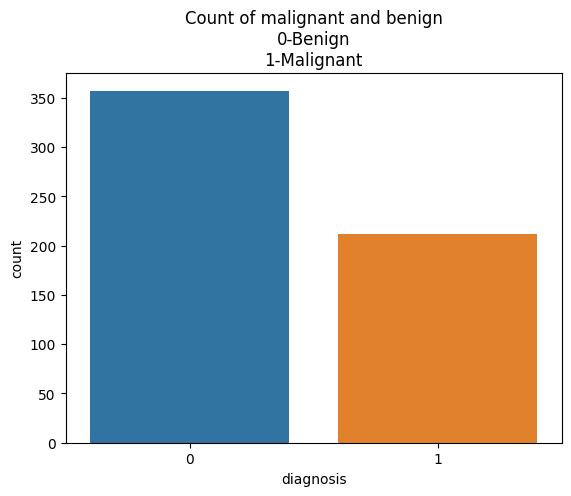

In [ ]:
sns.countplot(x=data["diagnosis"],data=data)
plt.title("Count of malignant and benign\n0-Benign\n1-Malignant")

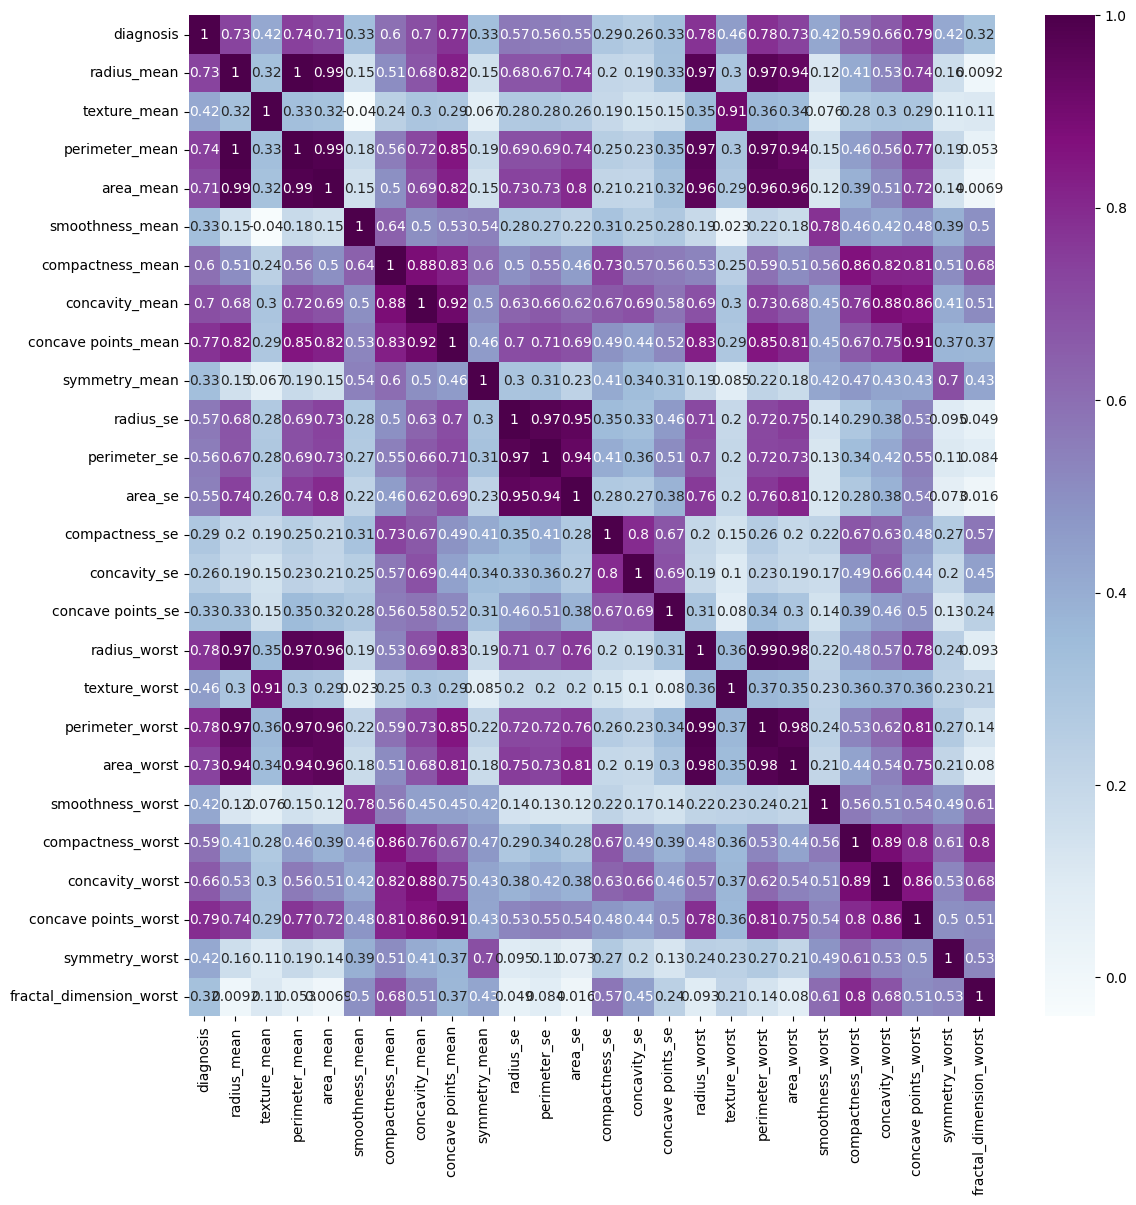

In [ ]:
fg,a = plt.subplots(figsize =(13,13))
a = sns.heatmap(data.corr(),annot=True,cmap='BuPu')

([<matplotlib.patches.Wedge at 0x7f6b97e8dc90>,
 [Text(0.428654794805217, 1.013042480299073, 'Malignant'),
  Text(-0.4286548896530974, -1.01304244016551, 'Benign')],
 [Text(0.23381170625739106, 0.5525686256176761, '37.3%'),
  Text(-0.23381175799259854, -0.5525686037266418, '62.7%')])

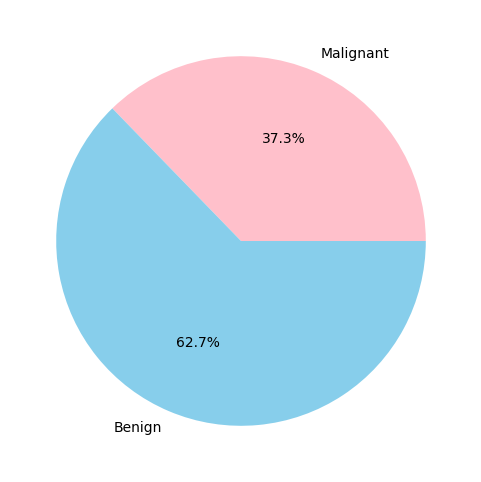

In [ ]:
f=plt.figure(figsize=(6,6))
x=data["diagnosis"].value_counts().sort_values()
plt.pie(x=x,labels=['Malignant','Benign'],autopct='%1.1F%%',colors=["pink","skyblue"])


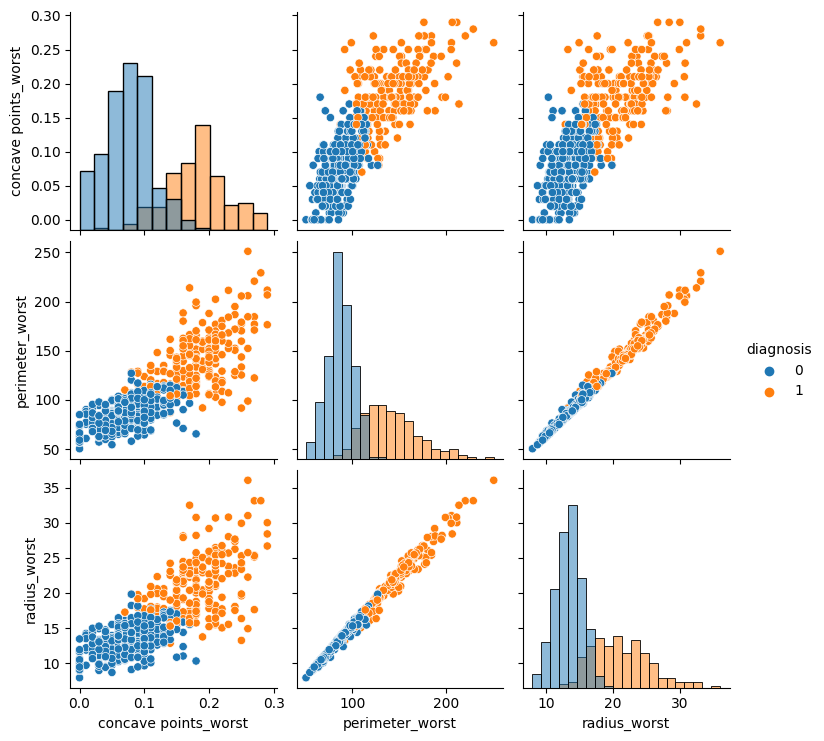

In [ ]:
sns.pairplot(data[['concave points_worst', 'perimeter_worst', 'radius_worst','diagnosis']], hue="diagnosis", diag_kind="hist")
plt.show()

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

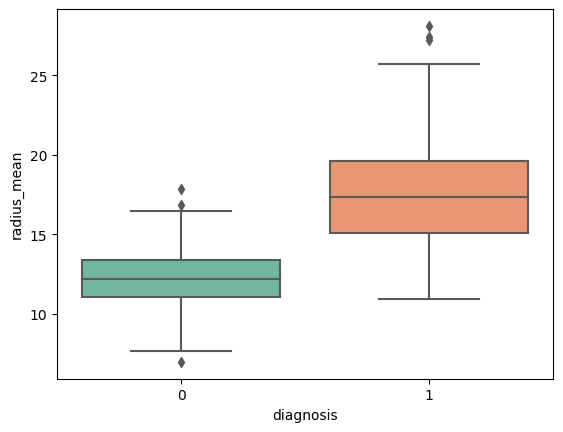

In [ ]:
sns.boxplot(x=data['diagnosis'], y=data['radius_mean'], palette='Set2')

<Axes: xlabel='symmetry_mean', ylabel='Density'>

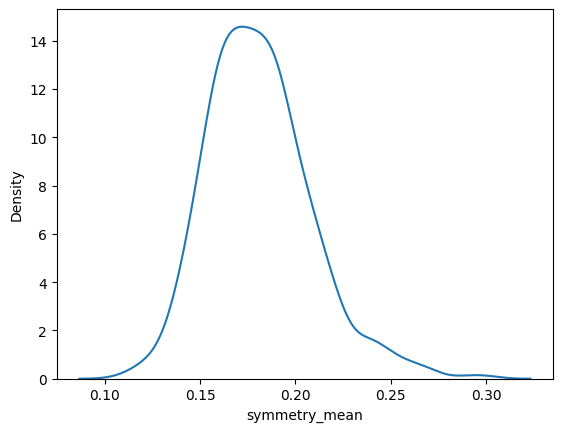

In [ ]:
import seaborn
seaborn.kdeplot(data=data, x='symmetry_mean')

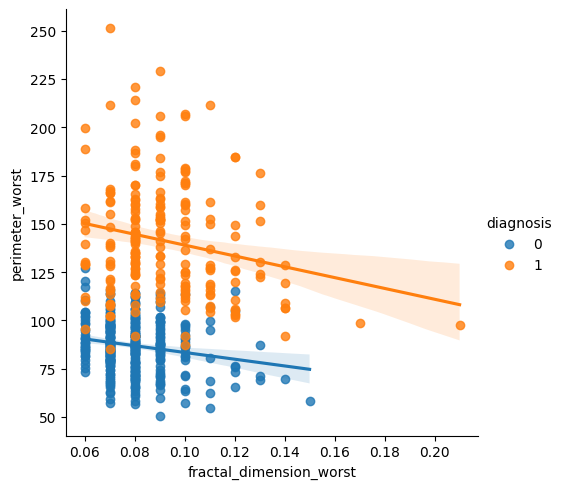

In [ ]:
sns.lmplot(data=data, x="fractal_dimension_worst", y="perimeter_worst", hue="diagnosis")

<Axes: xlabel='diagnosis', ylabel='concavity_worst'>

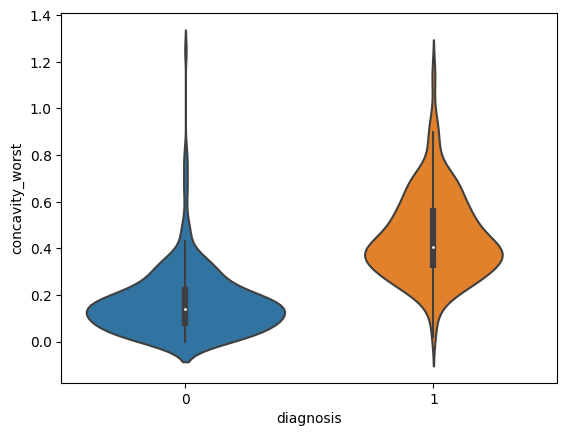

In [ ]:
sns.violinplot(data=data,x="diagnosis",y="concavity_worst",)

In [ ]:
all_variables=data.drop("diagnosis",axis=1)
target_variable=data["diagnosis"]

In [ ]:
x_train_data,x_test_data,y_train_data,y_test_data=train_test_split(all_variables,target_variable,test_size=0.3,random_state=42)

In [ ]:
print('x_train data values : ', x_train_data.shape)
print('x_test data values : ', x_test_data.shape)
print('y_train data values : ', y_train_data.shape)
print('y_test values data : ', y_test_data.shape)


x_train data values :  (398, 25)
x_test data values :  (171, 25)
y_train data values :  (398,)
y_test values data :  (171,)


Applying PCA to reduce dimensionality

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,svd_solver='auto')
x_train_pca=pca.fit_transform(x_train_data,y_train_data)
x_test_pca=pca.fit_transform(x_test_data)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=50000)
lr.fit(x_train_pca,y_train_data)
lr_predicted_value=lr.predict(x_test_pca)

In [ ]:
lr_accuracy = accuracy_score(y_test_data,lr_predicted_value)*100
print("Accuracy score:",lr_accuracy,"%")

Accuracy score: 84.7953216374269 %


Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       108
           1       0.75      0.87      0.81        63

    accuracy                           0.85       171
   macro avg       0.84      0.85      0.84       171
weighted avg       0.86      0.85      0.85       171

--------------------------------------------------------


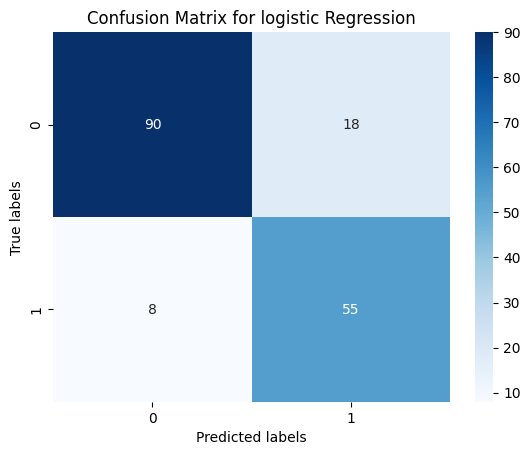

In [ ]:
print("Classification Report for Logistic Regression")
print(classification_report(y_test_data, lr_predicted_value))
print("--------------------------------------------------------")
conf_matrix = confusion_matrix(y_test_data, lr_predicted_value)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for logistic Regression')
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)

rf.fit(x_train_pca,y_train_data)
rf_predict_value=rf.predict(x_test_pca)

In [ ]:
rf_accuracy = accuracy_score(y_test_data,rf_predict_value)*100
print("Accuracy score:",rf_accuracy,"%")


Accuracy score: 92.39766081871345 %


Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       108
           1       0.92      0.87      0.89        63

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171

--------------------------------------------------------


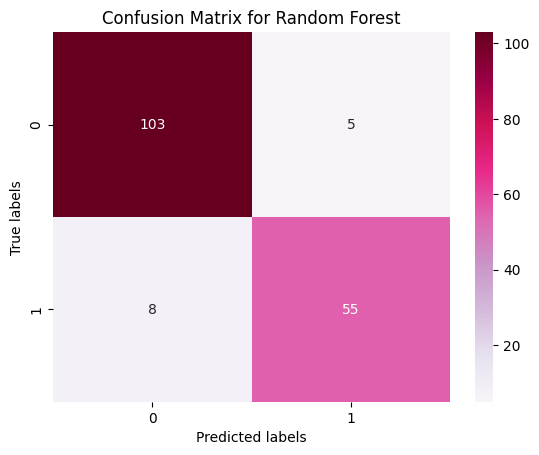

In [ ]:
print("Classification Report for Random Forest")
print(classification_report(y_test_data, rf_predict_value))
print("--------------------------------------------------------")
conf_matrix = confusion_matrix(y_test_data, rf_predict_value)
sns.heatmap(conf_matrix, annot=True, cmap='PuRd', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()

Multi Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(100,), activation='relu',solver='adam',max_iter=1000000)
mlp.fit(x_train_pca,y_train_data)
mlp_y_pred=mlp.predict(x_test_pca)

In [ ]:
mlp_accuracy = accuracy_score(y_test_data, mlp_y_pred)*100
print("Accuracy:",mlp_accuracy,"%")

Accuracy: 89.47368421052632 %


Classification Report for Multi Layer Perceptron
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       108
           1       0.87      0.84      0.85        63

    accuracy                           0.89       171
   macro avg       0.89      0.88      0.89       171
weighted avg       0.89      0.89      0.89       171

--------------------------------------------------------


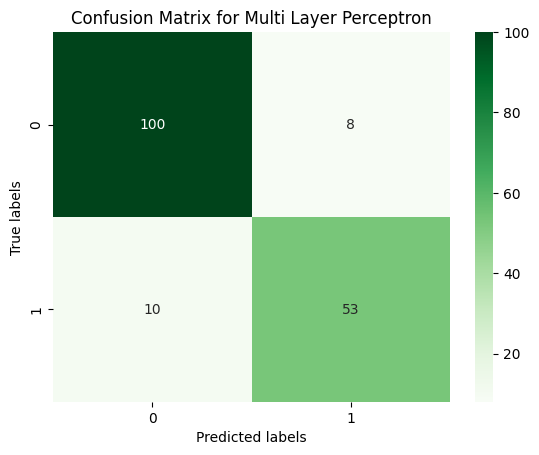

In [ ]:
print("Classification Report for Multi Layer Perceptron")
print(classification_report(y_test_data, mlp_y_pred))
print("--------------------------------------------------------")
conf_matrix = confusion_matrix(y_test_data, mlp_y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Multi Layer Perceptron')
plt.show()

Supoort Vector Machine

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
a=make_pipeline(StandardScaler(),SVC(kernel='rbf',gamma='auto'))
a.fit(x_train_pca,y_train_data)
y_pred =a.predict(x_test_pca)

In [ ]:
svm_accuracy = accuracy_score(y_test_data, y_pred)*100
print("Accuracy:",svm_accuracy,"%")

Accuracy: 83.04093567251462 %


Classification Report for Support Vector Machine
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       108
           1       0.74      0.84      0.79        63

    accuracy                           0.83       171
   macro avg       0.82      0.83      0.82       171
weighted avg       0.84      0.83      0.83       171

--------------------------------------------------------


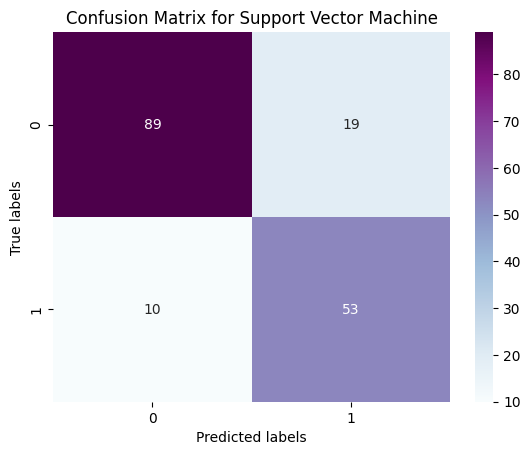

In [ ]:
print("Classification Report for Support Vector Machine")
print(classification_report(y_test_data, y_pred))
print("--------------------------------------------------------")
conf_matrix = confusion_matrix(y_test_data, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

In [ ]:
models = p.DataFrame({

    'Model': ['Logistic Regression','Random Forest','Multi Layer Perceptron','Support Vector Machine'],
    'Scores':[lr_accuracy,rf_accuracy,mlp_accuracy,svm_accuracy]
                      })
models.sort_values(by='Scores', ascending=False)

,Model,Scores
1,Random Forest,92.397661
2,Multi Layer Perceptron,89.473684
0,Logistic Regression,84.795322
3,Support Vector Machine,83.040936


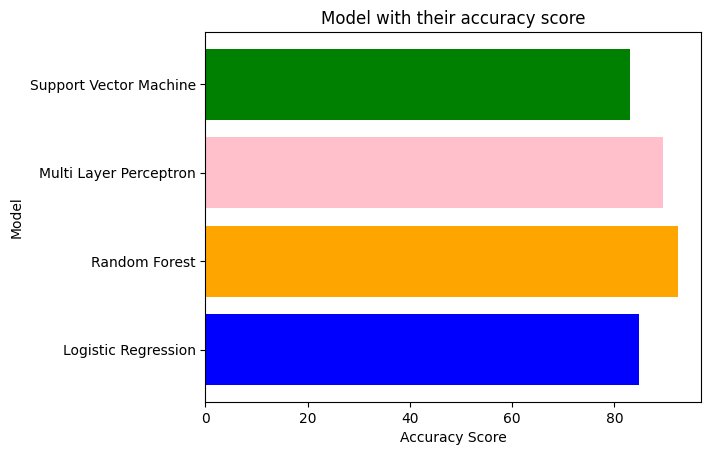

In [ ]:
plt.barh(models['Model'],models['Scores'],color=['blue','orange','pink','green'])
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.title('Model with their accuracy score')
plt.show()

Compared to all four models Random forest gave highest accuracy